<a href="https://colab.research.google.com/github/mark47B/Matrix-Factorization-Analysis/blob/main/U%5ETDU_factorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

# Генерация матриц


In [14]:
def get_matrix(n=None, ):
  if n is None:
    n = random.randint(2, 400)
  A = np.random.randint(0,  65536, (n, n))
  A = A.T * A
  return A

In [15]:
def get_matrix_3d(n=None, ):
  if n is None:
    n = random.randint(3, 400)
  A = np.random.randint(0,  65536, n)
  B = np.random.randint(0,  65536, n-1)
  M = np.diag(A, k=0) + np.diag(B, k=1)
  return M.T @ M

In [16]:
OPERATIONS = 0

# Алгоритм $U^TDU$-факторизации

In [17]:
A = np.array([[25, 5, 5], [5, 10, 4], [5, 4, 1]])

In [18]:
def UDU_factorization(A: np.array):
    n = A.shape[0]
    global OPERATIONS
    OPERATIONS = 0
    U = np.empty((n, n))
    U[:] = np.nan
    D = np.empty((n, n))
    D[:] = .0
    for i in range(0, n):
        tmp = 0
        for r in range(0, i):
            OPERATIONS += 3
            tmp += U[r][i] * U[r][i] * D[r][r]
        D[i][i] = A[i][i] - tmp
        for j in range(0, n):
            tmp = 0
            for k in range(0, i):
                OPERATIONS += 3
                tmp += U[k][i] * U[k][j] * D[k][k]
            OPERATIONS += 1
            U[i][j] = ((A[i][j] - tmp) / D[i][i]) if j > i else 0

    return U + np.eye(n), D

### Проверка работоспособности алгоритма

In [19]:
P, O = UDU_factorization(A)
print(P)
print(O)

[[1.         0.2        0.2       ]
 [0.         1.         0.33333333]
 [0.         0.         1.        ]]
[[25.  0.  0.]
 [ 0.  9.  0.]
 [ 0.  0. -1.]]


In [20]:
np.matmul(np.matmul(P.T, O), P) - A

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### Эксперимент

In [21]:
dim = 300


In [22]:
dim_operations_matrix = np.zeros((dim,))
computing_time = [0, 0, 0]
dim_operations_matrix

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
for i in range(3, dim):
  start= time.clock()
  UDU_factorization(get_matrix(i))
  end = time.clock()
  computing_time.append((end-start))
  dim_operations_matrix[i] = OPERATIONS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [24]:
x = np.arange(0, dim, 1)

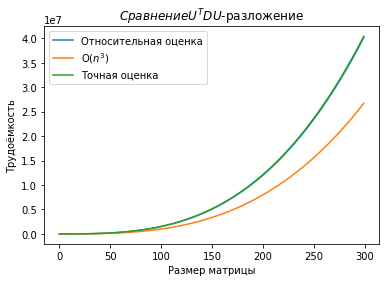

In [25]:
plt.title("$Сравнение U^TDU$-разложение")
plt.xlabel("Размер матрицы")
plt.ylabel("Трудоёмкость")
plt.plot(x, dim_operations_matrix, label='Относительная оценка')
plt.plot(x, x**3, label='O($n^3$)')
plt.plot(x, 3*(x-1)/2 + x*(x-1)+ 3*(2+x)*x*x/2, label='Точная оценка')
plt.legend()
plt.savefig('U^TDU-factorization.png')

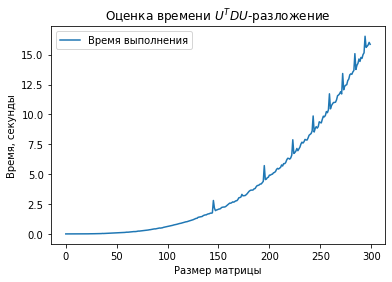

In [26]:
plt.title("Оценка времени $U^TDU$-разложение")
plt.xlabel("Размер матрицы")
plt.ylabel("Время, секунды")
plt.plot(x, computing_time, label='Время выполнения')
plt.legend()
plt.savefig('U^TDU-factorization_time.png')

# Алгоритм $U^TDU$-факторизации для трёхдиагональной матрицы

In [27]:
def UDU_factorization_3diag(A: np.array):
    global OPERATIONS
    OPERATIONS = 0
    n = A.shape[0]
    U = np.empty((n-1,))
    U[:] = np.nan
    D = np.empty((n,))
    D[:] = .0
    D[0] = A[0][0]
    U[0] = A[0][1]/D[0]
    for i in range(1, n-1):
      D[i] = A[i][i] - U[i-1]*U[i-1]*D[i-1]
      U[i] = A[i][i+1] / D[i]
      OPERATIONS += 4
    D[n-1] = A[n-1][n-1] - U[n-2]*U[n-2]*D[n-2]



    return np.diag(U, k=1) + np.eye(n), np.diag(D)

### Проверка работоспособности

In [28]:
A = get_matrix_3d(4)
A

array([[1982564676, 1649153988,          0,          0],
       [1649153988, 1389995140,  270627552,          0],
       [         0,  270627552, 4619308993, 1005293924],
       [         0,          0, 1005293924, 5186882128]])

In [29]:
P, O = UDU_factorization_3diag(A)
print(A)
print(P)
print(O)
np.matmul(np.matmul(P.T, O), P) - A

[[1982564676 1649153988          0          0]
 [1649153988 1389995140  270627552          0]
 [         0  270627552 4619308993 1005293924]
 [         0          0 1005293924 5186882128]]
[[ 1.          0.83182859  0.          0.        ]
 [ 0.          1.         14.88461538  0.        ]
 [ 0.          0.          1.          1.70065397]
 [ 0.          0.          0.          1.        ]]
[[1.98256468e+09 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.81816960e+07 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.91121969e+08 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.47722502e+09]]


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -2.38418579e-07,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

### Эксперимент

In [30]:
dim = 500

In [31]:
dim_operations_matrix = np.zeros((dim,))
computing_time = [0, 0, 0]

In [32]:
for i in range(3, dim):
  start= time.clock()
  UDU_factorization_3diag(get_matrix_3d(i))
  end = time.clock()
  computing_time.append((end-start))
  dim_operations_matrix[i] = OPERATIONS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [33]:
x = np.arange(0, dim, 1)

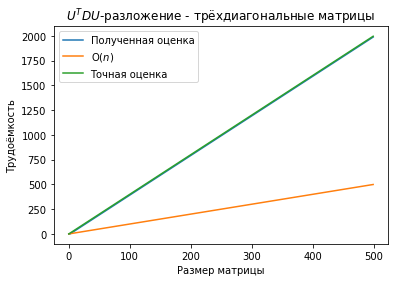

In [34]:
plt.title("$U^TDU$-разложение - трёхдиагональные матрицы")
plt.xlabel("Размер матрицы")
plt.ylabel("Трудоёмкость")

plt.plot(x, dim_operations_matrix, label='Полученная оценка')
plt.plot(x, x, label='O($n$)')
plt.plot(x, 4*x, label='Точная оценка')

plt.legend()
plt.savefig('U^TDU-factorization_3d.png')

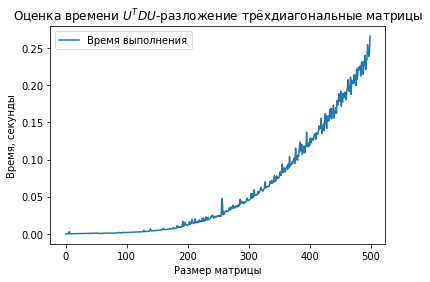

In [35]:
plt.title("Оценка времени $U^TDU$-разложение трёхдиагональные матрицы")
plt.xlabel("Размер матрицы")
plt.ylabel("Время, секунды")

plt.plot(x, computing_time, label='Время выполнения')

plt.legend()
plt.savefig('U^TDU-factorization_3d_time.png')

# Характеристики оборудования

In [36]:
!vmstat -s

     13297228 K total memory
      1059704 K used memory
       577968 K active memory
      4243692 K inactive memory
      8256268 K free memory
       325616 K buffer memory
      3655640 K swap cache
            0 K total swap
            0 K used swap
            0 K free swap
       381501 non-nice user cpu ticks
            0 nice user cpu ticks
        11366 system cpu ticks
       350131 idle cpu ticks
         2762 IO-wait cpu ticks
            0 IRQ cpu ticks
          413 softirq cpu ticks
          336 stolen cpu ticks
      3934390 pages paged in
      1201793 pages paged out
            0 pages swapped in
            0 pages swapped out
      5432385 interrupts
      3451547 CPU context switches
   1669408998 boot time
        36582 forks


In [37]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   23G   86G  21% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  910M  54% /sbin/docker-init
tmpfs           6.4G   40K  6.4G   1% /var/colab
/dev/sda1        65G   40G   25G  62% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [38]:
!cat /proc/partitions

major minor  #blocks  name

   7        0  115343360 loop0
   8        0   73400320 sda
   8        1   69048303 sda1
   8        2      16384 sda2
   8        3    2097152 sda3
   8        4      16384 sda4
   8        5    2097152 sda5
   8        6          0 sda6
   8        7          0 sda7
   8        8      16384 sda8
   8        9          0 sda9
   8       10          0 sda10
   8       11       8192 sda11
   8       12      32768 sda12
 253        0    2038784 dm-0


In [39]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes